<center>
  <h1 style="font-weight: bold; color: darkred;">BANK MARKETING ANALYSIS</h1>
</center>

<center>
  <h3 style="font-weight: bold; color: darkblue;">Predicting Bank Deposit Subscription</h3>
</center>

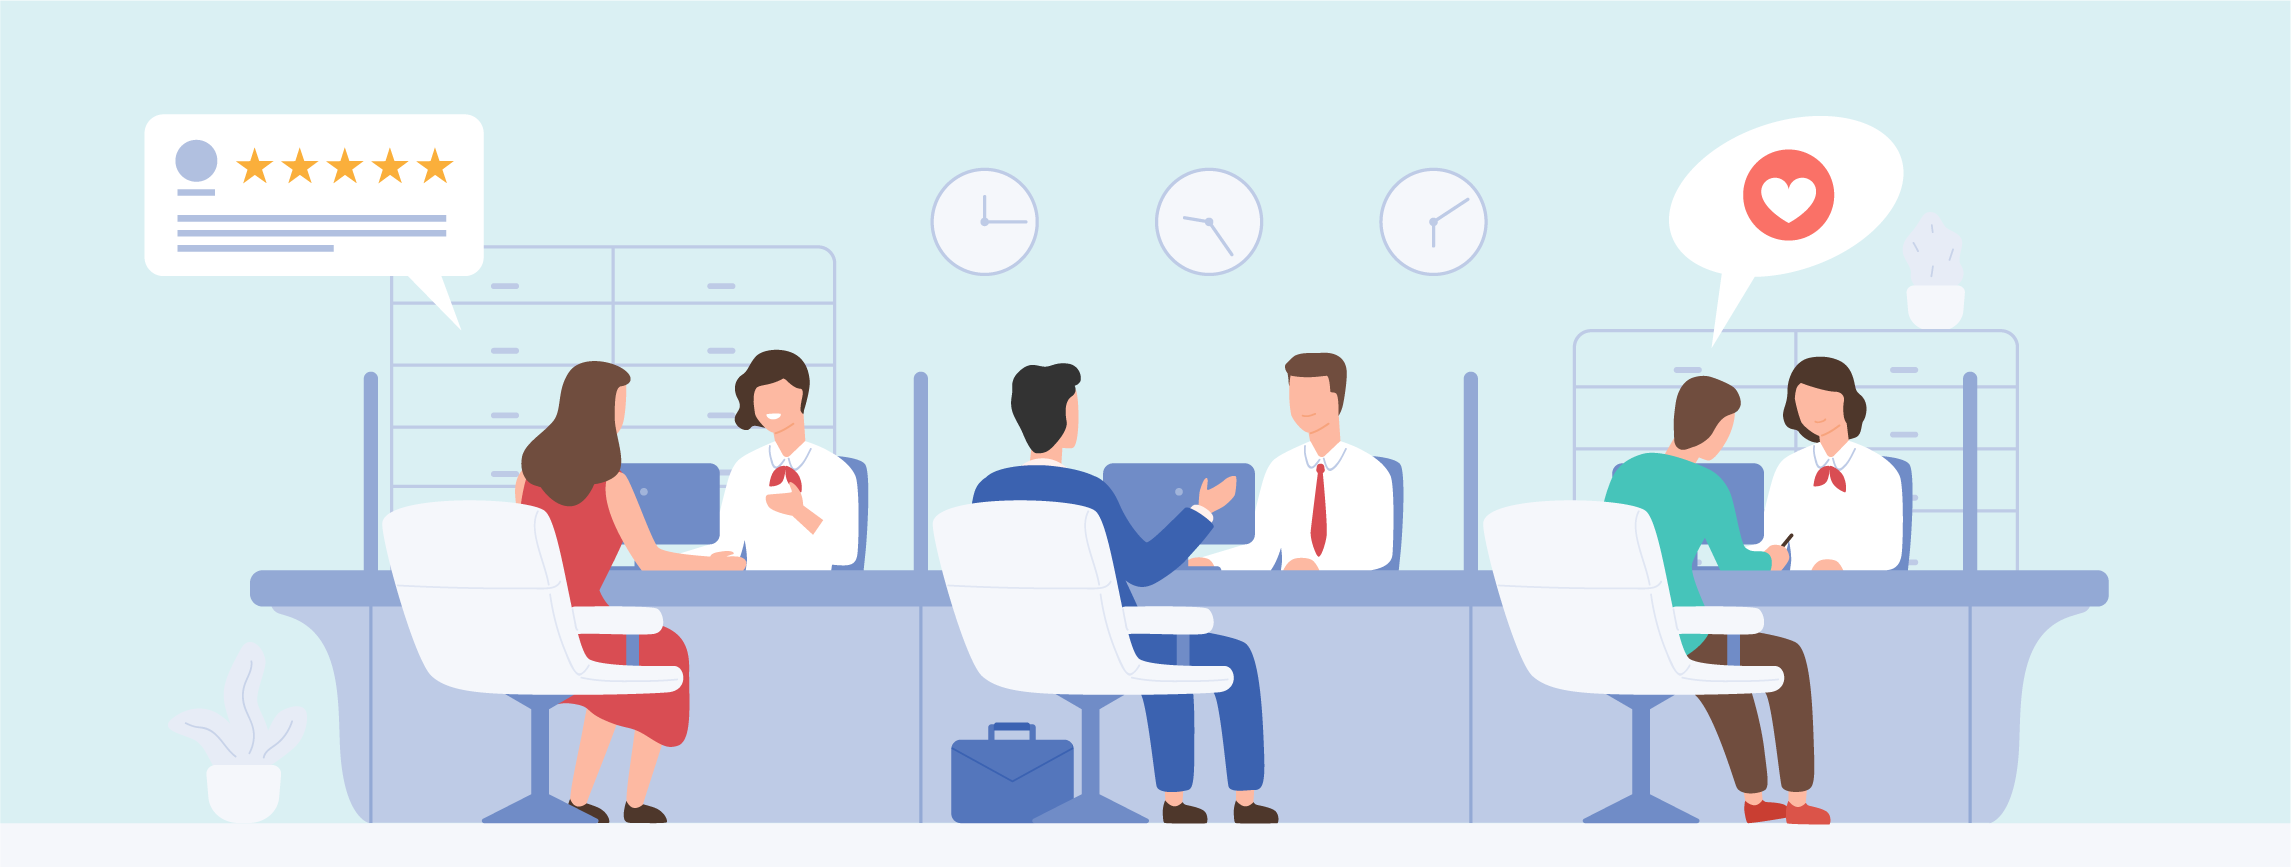

<center>
  <h1 style="font-weight: bold; color: darkblue;">INTRODUCTION</h1>
</center>

### Overview :
In this project, we work with the Bank Marketing Dataset, which is a collection of data related to direct marketing campaigns of a Portuguese bank. The primary objective is to predict whether a customer will subscribe to a term deposit (a binary classification problem). The dataset contains several features such as customer information, campaign details, and contact interactions.
### Dataset Description :
The dataset consists of various demographic and behavioral features collected during phone calls with potential customers. The bank uses this data to target customers more effectively in order to increase deposit subscriptions.
### The columns in the dataset are as follows :
* Age : The age of the customer.
* Job : The type of job the customer holds (e.g., admin, technician, etc.).
* Marital: The marital status of the customer (e.g., married, single, divorced).
* Education: The highest level of education attained by the customer (e.g., primary, secondary, tertiary).
* Default : Does the client have credit in default (yes/no).
* Balance: The customer's average yearly balance.
* Housing: Whether the customer has a housing loan (yes/no).
* Loan: Whether the customer has a personal loan (yes/no).
* Contact: The communication type used to contact the customer (e.g., cellular, telephone).
* Day : The day of the month when the client was last contacted.
* Month: The month of the year in which the customer was last contacted.
* Duration: The duration (in seconds) of the last phone call.
* Campaign : Number of contacts made during this campaign for this client.
* PDays : Number of days since the client was last contacted in a previous campaign.
* Previous : Number of contacts performed before this campaign.
* POutcome: The outcome of the previous marketing campaign (e.g., success, failure, unknown).
* Deposit (Target): Whether the customer subscribed to a term deposit (yes/no).
### Classification of features : 
* Target Variable : Deposit
* Client-related Features : Age , Job , Marital , Education , Default , Balance , Housing , Loan
* Contact and Campaign Features : Contact , Day , Month , Duration
* Campaign-related Features : Campaign , PDays , Previous , POutcome
### Approach
1. Data Loading 
2. Descriptive Analysis
3. Data Cleaning and Preprocessing
4. Feature Engineering
5. Exploratory Data Analysis (EDA)
6. Outlier Treatment
7. Encoding
8. Model Building
9. Tabulating the Results of Model
10. Visualizing Model Performance
11. Evaluating the Model
12. Hyperparameter Tuning

<center>
  <h1 style="font-weight: bold; color: darkblue;">DATA LOADING</h1>
</center>

#### Loading Dependencies

In [1]:
# Numerical operations and calculations
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization and plotting
import matplotlib.pyplot as plt

# Enhanced data visualization and statistical graphics
import seaborn as sns

# Ignores warning messages.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To split the data into train and test
from sklearn.model_selection import train_test_split

In [5]:
# Install catboost
!pip install catboost

In [6]:
# Instaal lightgbm
!pip install lightgbm

# Ignoring lightgbm installation warnings
import logging
logging.getLogger('lightgbm').setLevel(logging.ERROR)

In [9]:
# Install xgboost
!pip install xgboost

In [11]:
# Loading classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [13]:
# Loading classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [15]:
# To create the model performance into a table
from tabulate import tabulate

In [17]:
# Loading hyperparameter tuning models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#### Loading Dataset

In [20]:
loan_data = pd.read_csv('./Bank Marketing Dataset.csv')

In [22]:
loan_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


<center>
  <h1 style="font-weight: bold; color: darkblue;">DESCRIPTIVE ANALYSIS</h1>
</center>


In [25]:
loan_data.head(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes


* Shows first 8 rows of the loan_data DataFrame.

In [28]:
loan_data.tail(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


* Shows last 8 rows of the loan_data DataFrame.

In [31]:
loan_data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1383,46,admin.,married,secondary,no,-522,yes,no,cellular,27,mar,243,3,239,13,other,yes
7850,58,self-employed,married,secondary,no,0,yes,no,unknown,15,may,272,9,-1,0,unknown,no
3803,29,student,single,secondary,no,1377,yes,no,cellular,3,aug,248,1,446,2,success,yes
10012,31,technician,married,secondary,no,2420,yes,no,cellular,19,nov,166,1,-1,0,unknown,no
9519,56,admin.,single,secondary,no,-273,no,no,cellular,8,jul,119,2,-1,0,unknown,no
4446,31,admin.,single,tertiary,no,4041,no,no,cellular,30,apr,1034,2,-1,0,unknown,yes
2543,82,retired,married,secondary,no,276,no,no,telephone,17,aug,199,1,-1,0,unknown,yes
2565,30,management,single,tertiary,no,5359,no,no,cellular,19,aug,145,1,84,2,success,yes
5240,55,technician,divorced,secondary,no,3450,no,no,cellular,10,feb,169,1,183,1,failure,yes
8147,32,technician,single,secondary,no,945,no,no,cellular,4,may,312,3,-1,0,unknown,no


* Shows random sample of 10 rows from the loan_data DataFrame.

In [34]:
loan_data.shape

(11162, 17)

* DataFrame contains 17 columns and 11162 rows.

In [37]:
loan_data.size

189754

* Dataframe contains 189754 total entries.

In [40]:
loan_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

* Displays the features  that are in the dataframe.

In [43]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


* The DataFrame has 11,162 rows and 17 columns.
* The output lists each column, its non-null count, and its data type.
* The DataFrame contains a mix of data types.
* int64 : 7 columns (age, balance, day, duration, campaign, pdays, previous)
* object : 10 columns (job, marital, education, default, housing, loan, contact, month, poutcome, deposit)
* There are no missing values in the DataFrame, as all columns have 11,162 non-null counts.
* The DataFrame occupies approximately 1.4+ MB of memory.

In [46]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


* The dataset contains information about bank clients, including their age, account balance, and various metrics related to marketing campaigns.
* The wide ranges and high standard deviations in columns like "balance," "duration," and "pdays" suggest significant variability in the data.
* The presence of negative values in "balance" and "pdays" may indicate specific conditions or errors in data collection.
* The "campaign," "pdays," and "previous" columns provide insights into the bank's marketing efforts and client interaction history.

<center>
  <h1 style="font-weight: bold; color: darkblue;">DATA CLEANING AND PREPROCESSING</h1>
</center>


#### Checking Missing Values

In [51]:
loan_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* No null values were detected in the columns.

#### Checking duplicate values

In [55]:
loan_data.duplicated().sum()

0

* No duplicate records were found in the dataset.

#### Checking each columns data type

In [59]:
loan_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

* 7 columns are of type int64, which are likely numerical values.
* 10 columns are of type object, which are likely categorical or string values.

#### Found the number of unique values of each column

In [63]:
loan_data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

#### Displayed the unique values in each column

In [66]:
for i in loan_data.columns:
    print(i)
    print(loan_data[i].unique())
    print("-"*50)
    print("\n")

age
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
--------------------------------------------------


job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
--------------------------------------------------


marital
['married' 'single' 'divorced']
--------------------------------------------------


education
['secondary' 'tertiary' 'primary' 'unknown']
--------------------------------------------------


default
['no' 'yes']
--------------------------------------------------


balance
[2343   45 1270 ... 1594 2593 -134]
--------------------------------------------------


housing
['yes' 'no']
--------------------------------------------------


loan
['no' 'yes']
---------------------------------------

#### Checking the data distribution

In [69]:
loan_num_cols = loan_data.select_dtypes(include = ['int'])

In [71]:
loan_num_cols

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


#### Plotting the distribution

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

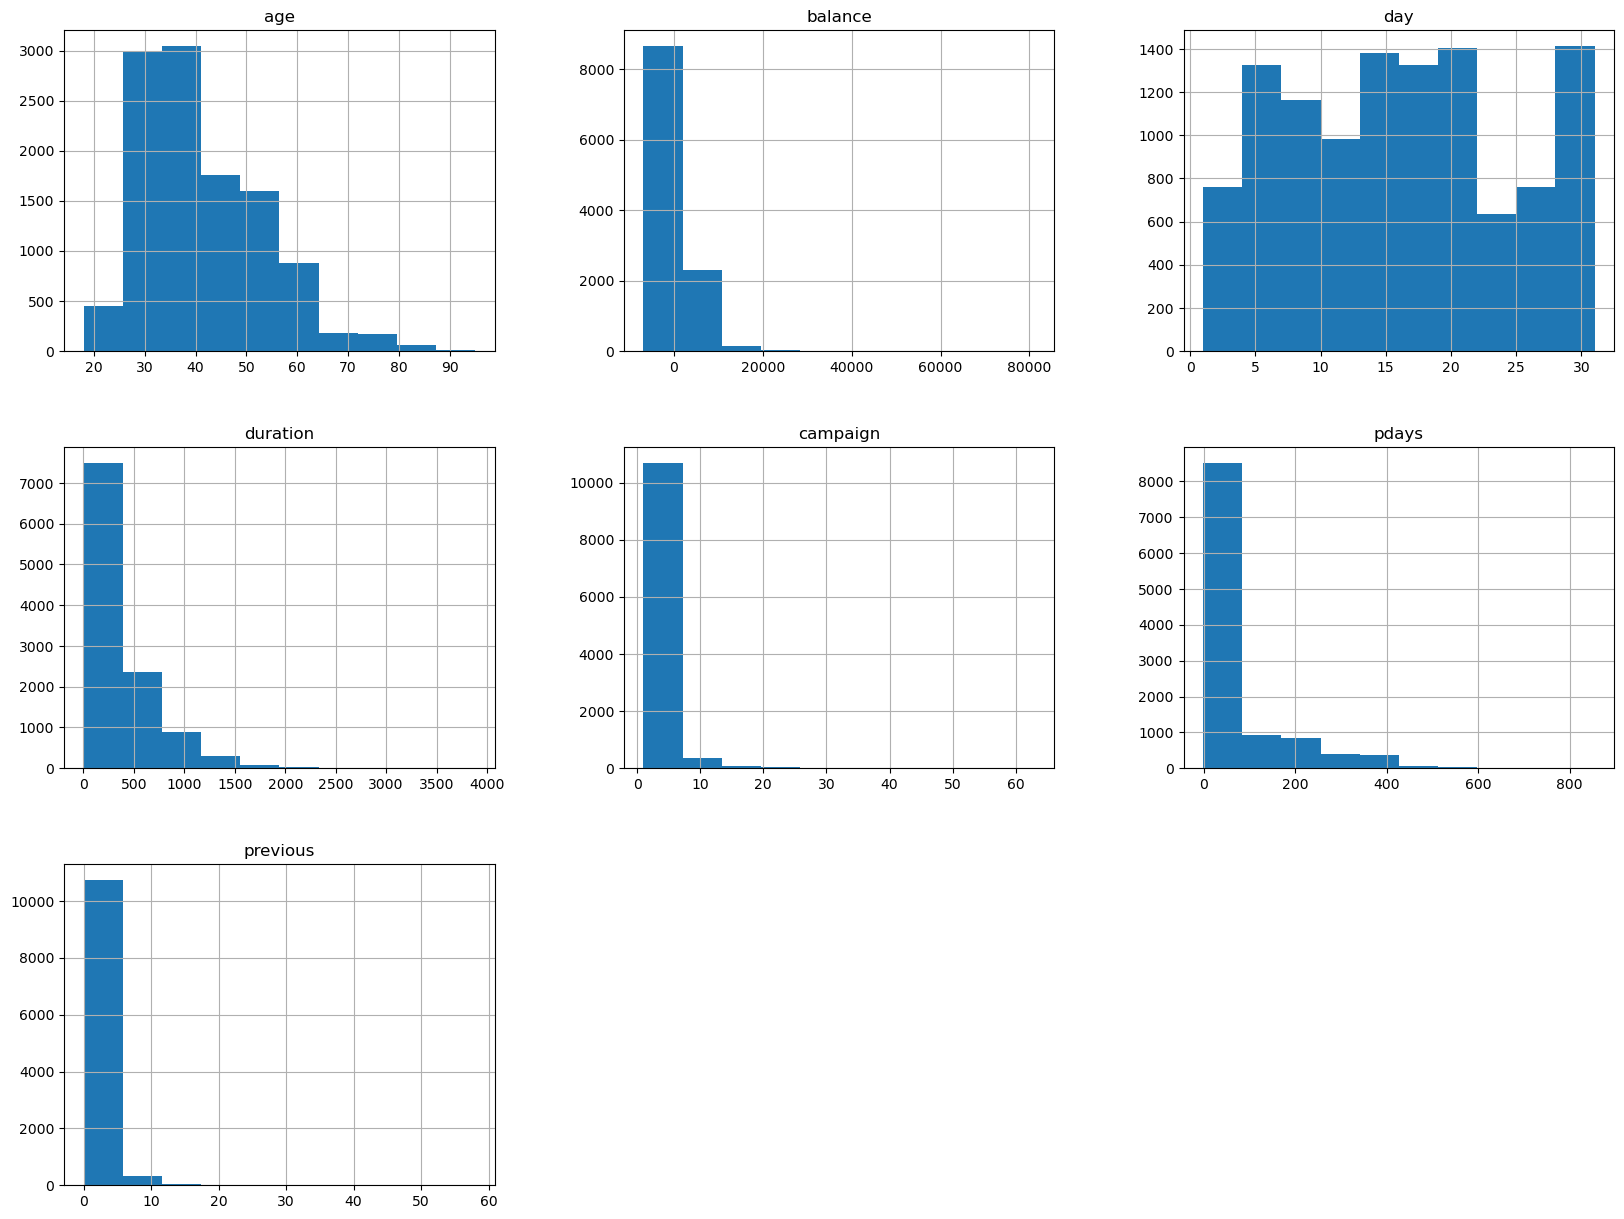

In [74]:
loan_num_cols.hist(figsize = (20,15))

* These histograms provide a visual representation of various features.
* Help as to find whether the features shows skewed or normal distribution.

#### Grouping 

In [78]:
# Group by job and see average deposit rate

job_deposit_rate = loan_data.groupby('job')['deposit'].value_counts(normalize=True)
print(job_deposit_rate)

job            deposit
admin.         no         0.526987
               yes        0.473013
blue-collar    no         0.635802
               yes        0.364198
entrepreneur   no         0.625000
               yes        0.375000
housemaid      no         0.602190
               yes        0.397810
management     yes        0.507015
               no         0.492985
retired        yes        0.663239
               no         0.336761
self-employed  no         0.538272
               yes        0.461728
services       no         0.600217
               yes        0.399783
student        yes        0.747222
               no         0.252778
technician     no         0.539221
               yes        0.460779
unemployed     yes        0.565826
               no         0.434174
unknown        no         0.514286
               yes        0.485714
Name: proportion, dtype: float64


* Shows deposit conversion rates per job type

In [81]:
# Average balance by education level

avg_balance_by_edu = loan_data.groupby('education')['balance'].mean().sort_values(ascending=False)
print(avg_balance_by_edu)

education
tertiary     1845.869070
unknown      1746.605634
primary      1523.031333
secondary    1296.480278
Name: balance, dtype: float64


* Helps understand if education correlates with higher account balances

<center>
  <h1 style="font-weight: bold; color: darkblue;">FEATURE ENGINEERING</h1>
</center>


#### Standardizing Job Titles

In [86]:
loan_data.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [88]:
loan_data['job'] = loan_data['job'].apply(lambda x: x.replace('admin.','admin'))

In [90]:
loan_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


* This line of code is used to standardize the values in the 'job' column of the loan_data DataFrame.
* It specifically targets the string 'admin.' and replaces it with 'admin', effectively removing the trailing dot.
* The apply() function is used to apply a lambda function to each element in the 'job' column.
* The lambda function takes a value x, replaces 'admin.' with 'admin' using the replace() method, and returns the result.
* This standardization is likely done to ensure consistency in the data, making it easier to analyze or process later.

#### Standardizing Balance Values

In [94]:
loan_data.balance.unique()

array([2343,   45, 1270, ..., 1594, 2593, -134], dtype=int64)

In [96]:
loan_data['balance'] = loan_data['balance'].apply(lambda x: np.abs(x))

In [98]:
loan_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


* This line of code is used to ensure that all values in the 'balance' column of the loan_data DataFrame are non-negative.
* It uses the apply() function to apply a lambda function to each element in the 'balance' column.
* The lambda function takes a value x and returns its absolute value using np.abs(x), where np is likely an alias for the NumPy library.
* The comment preceding this line suggests that there are negative balance values in the data, which might not be valid or meaningful in the context of the analysis.
* By taking the absolute value, the code effectively converts any negative balances to positive.

#### Mapping binary categorical columns ('yes'/'no') to numerical values (1/0) for easier analysis and model training

In [102]:
binary_map = {'yes': 1, 'no': 0}
binary_cols = ['housing', 'loan', 'deposit','default']

In [104]:
for col in binary_cols:
    loan_data[col] = loan_data[col].map(binary_map)

In [106]:
loan_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


* A dictionary binary_map that maps the categorical values 'yes' and 'no' to numerical values 1 and 0, respectively.
* A list binary_cols containing the names of the columns in the DataFrame that are to be mapped using binary_map.
* This loop iterates over each column name in binary_cols.
* For each column, it applies the map() function to replace the categorical values ('yes' or 'no') with the corresponding numerical values (1 or 0) based on the binary_map dictionary.
* The result is assigned back to the respective column in the loan_data DataFrame.

#### Age grouping

In [110]:
# Define age bins and labels for grouping
bins = [15, 25, 35, 45, 55, 65, 100]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']

In [112]:
# Create age group column
loan_data['age_group'] = pd.cut(loan_data['age'], bins=bins, labels=labels, right=True)

In [114]:
loan_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,55-64
1,56,admin,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1,55-64
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1,35-44
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1,45-54
4,54,admin,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1,45-54


* The code defines age bins and corresponding labels for grouping individuals based on their age.
* The bins are defined as [15, 25, 35, 45, 55, 65, 100], which means the age groups are 15-24, 25-34, 35-44, 45-54, 55-64, and 65 or older.
* The labels for these bins are ['15-24', '25-34', '35-44', '45-54', '55-64', '65+'].

<center>
  <h1 style="font-weight: bold; color: darkblue;">EXPLORATORY DATA ANALYSIS (EDA)</h1>
</center>

<h3 style="font-weight: bold; color: darkgreen;">UNIVARIANT ANALYSIS</h3>

#### 1. Target variable distribuaction

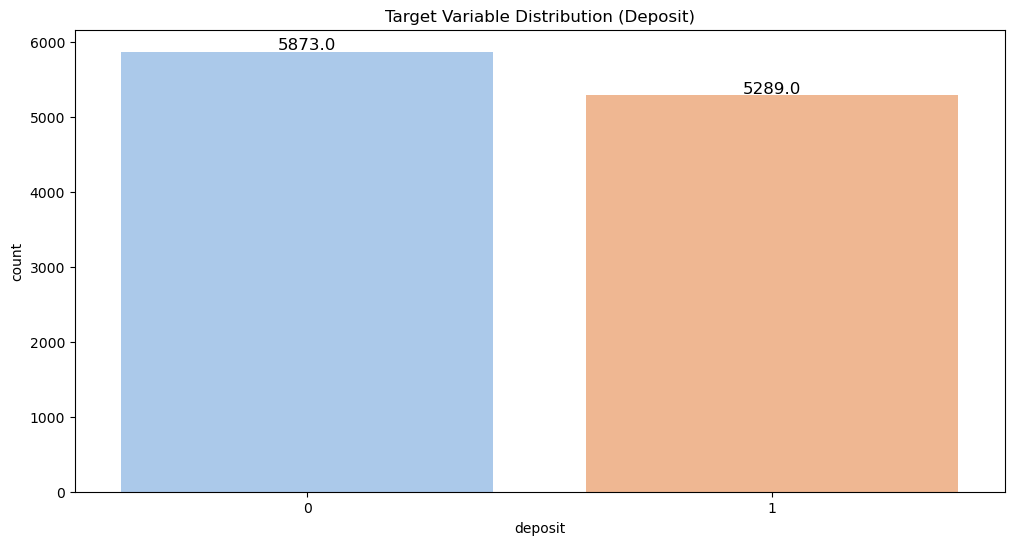

In [120]:
# Set figure size
plt.figure(figsize=(12,6))

ax = sns.countplot(data=loan_data, x='deposit', palette='pastel') 
plt.title("Target Variable Distribution (Deposit)")

# Adding the count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

* The blue bar has a value of 5873.0.
* The orange bar has a value of 5289.0.
* The y-axis represents the count or frequency, ranging from 0 to an unspecified maximum value.
* The chart illustrates the distribution of a target variable, likely related to deposits, across two distinct categories.
* The blue bar represents one category, while the orange bar represents another.
* The chart allows for a visual comparison between the two categories.
* The orange category has a slightly higher count (5289.0) compared to the blue category (5873.0), indicating a marginally greater frequency or magnitude.

#### 2. Job Distribution

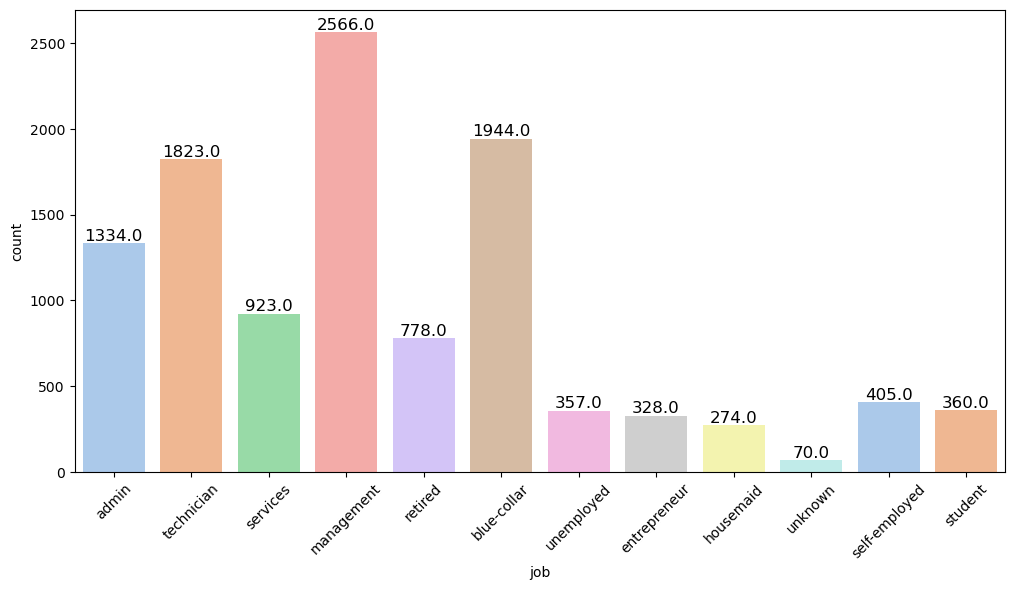

In [124]:
# Set figure size
plt.figure(figsize=(12,6))

ax = sns.countplot(data=loan_data, x='job', palette='pastel')
plt.xticks(rotation=45)

# Adding the count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

* The chart suggests that the majority of jobs fall under the "management," "blue-collar," and "technical" categories.
* The "management" category has a significantly higher count than the other categories, indicating a strong presence in the dataset.
* The "blue-collar" and "technical" categories also have substantial counts, suggesting a notable representation in the dataset.
* The remaining job categories have relatively lower counts, with "unknown" having the lowest count.

<h3 style="font-weight: bold; color: darkgreen;">BIVARIANT ANALYSIS</h3>

#### 3. Age distribution

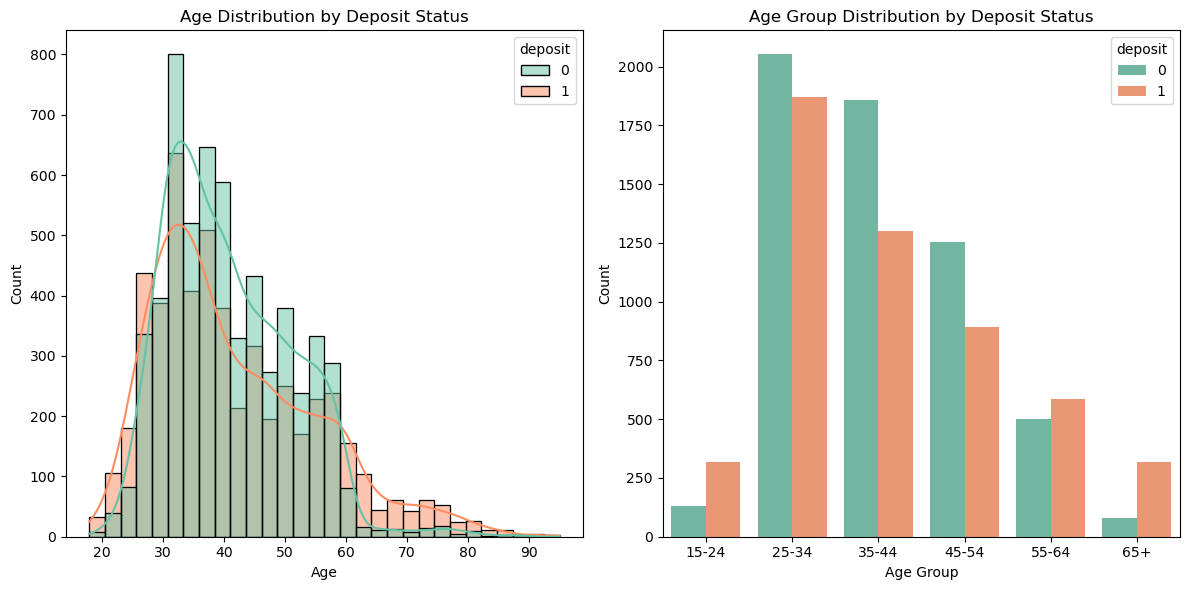

In [129]:
# Set the figure
plt.figure(figsize=(12,6))

# Plot 1: Histogram of raw ages
plt.subplot(1, 2, 1)
sns.histplot(data=loan_data, x='age', hue='deposit', kde=True, bins=30, palette='Set2')
plt.title("Age Distribution by Deposit Status")
plt.xlabel("Age")
plt.ylabel("Count")

# Plot 2: Countplot of age groups
plt.subplot(1, 2, 2)
sns.countplot(data=loan_data, x='age_group', hue='deposit', palette='Set2')
plt.title("Age Group Distribution by Deposit Status")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Plotting
plt.tight_layout()
plt.show()

* The majority of individuals in both categories fall within the 30-40 age range.
* The distribution of ages for both "yes" and "no" categories follows a similar pattern, with a peak around 35-40 years old.
* The count of individuals with a deposit ("yes") is higher than those without a deposit ("no") across most age groups.
* The second graph, titled "Age Group Distribution by Deposit Status," categorizes age into distinct groups (15-24, 25-34, 35-44, 45-54, 55-64, and 65+) and displays the count of individuals with and without deposits within each group.
* The 25-34 age group has the highest count for both "yes" and "no" categories.
* The proportion of individuals with deposits ("yes") increases with age, with the 65+ age group having a significantly higher proportion of "yes" compared to other age groups.
* The count of individuals without deposits ("no") decreases with age, with the 65+ age group having the lowest count.

#### 4. Job vs Deposit

In [133]:
job_counts = loan_data['job'].value_counts().sort_values(ascending=True).index

In [135]:
job_counts

Index(['unknown', 'housemaid', 'entrepreneur', 'unemployed', 'student',
       'self-employed', 'retired', 'services', 'admin', 'technician',
       'blue-collar', 'management'],
      dtype='object', name='job')

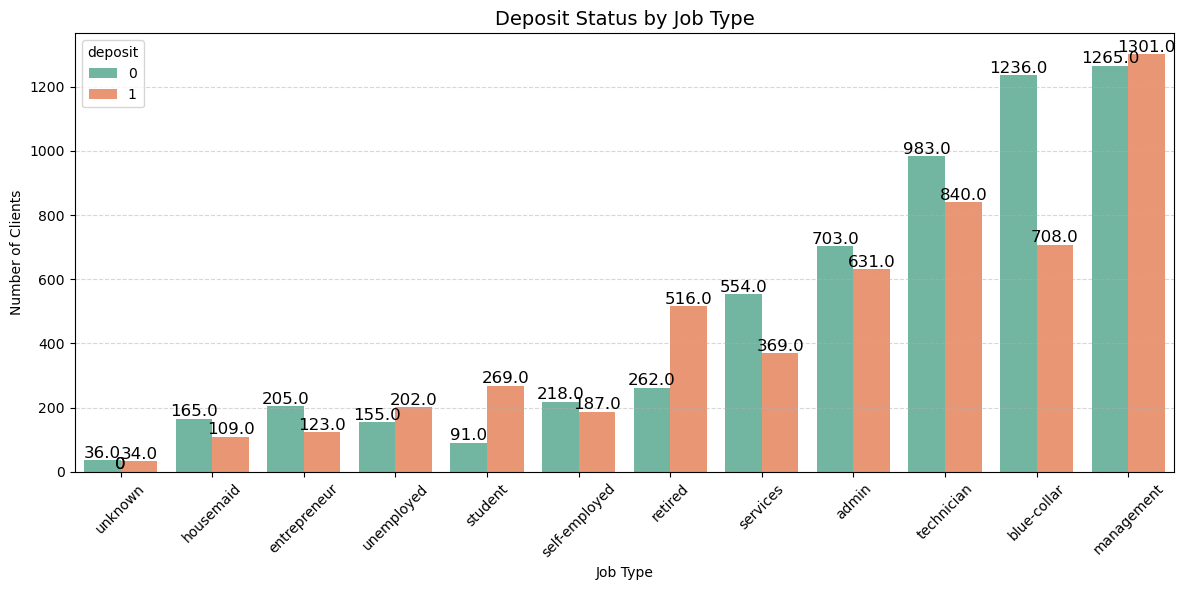

In [137]:
# Set figure size
plt.figure(figsize=(12,6))

# Assuming variables
ax = sns.countplot(data=loan_data, x='job', hue='deposit', palette='Set2',order = job_counts)

plt.title("Deposit Status by Job Type", fontsize=14)
plt.xlabel("Job Type")
plt.ylabel("Number of Clients")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding the count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Plotting
plt.tight_layout()
plt.show()

* The graph reveals that certain job types, such as "Blue-collar" and "Management," have a higher number of counts in both "Deposit" and "No Deposit" categories.
* In contrast, job types like "Unemployed" and "Entrepreneur" exhibit a significant disparity between the two categories.
* The data suggests that the deposit status varies significantly across different job types, with some categories having a much higher proportion of "Deposit" or "No Deposit" counts.

#### 5. Marital status vs Deposit

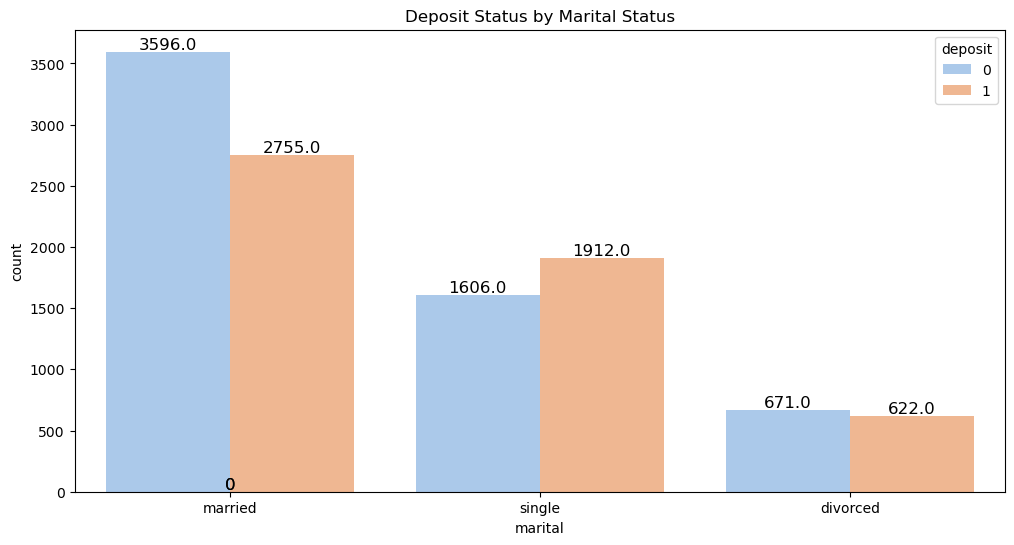

In [141]:
# Set figure size
plt.figure(figsize=(12,6))

ax = sns.countplot(data=loan_data, x='marital', hue='deposit',palette='pastel')
plt.title("Deposit Status by Marital Status")

# Adding the count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

* The graph suggests that there is a correlation between marital status and deposit status.
* Married individuals are more likely to have a deposit status of 0, while single/marital individuals are more likely to have a deposit status of 1.
* The data for divorced individuals is less conclusive due to the smaller sample size.

#### 6.Average Duration of Last Call by Age Group

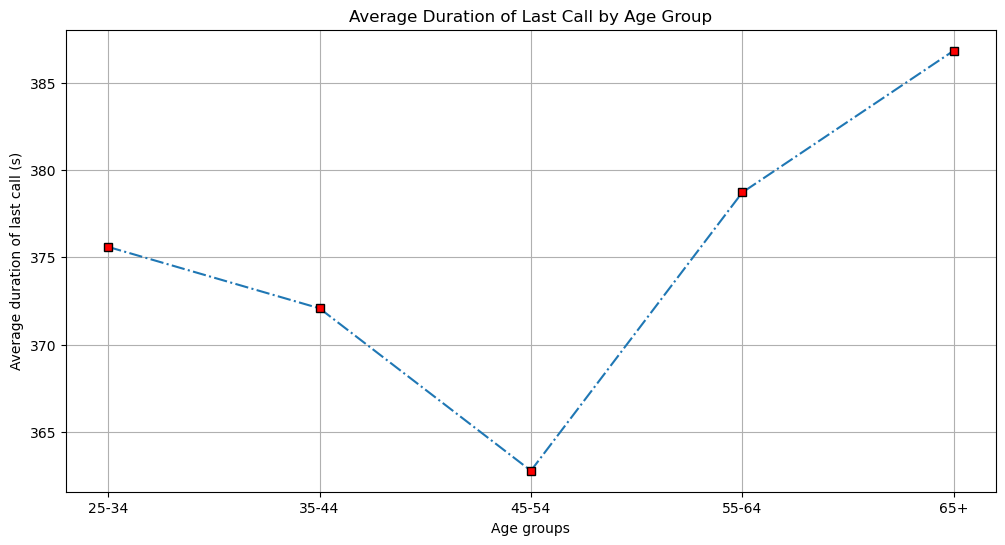

In [145]:
# Set figure size
plt.figure(figsize = (12,6))

plt.plot(loan_data.groupby('age_group')['duration'].mean()[1:],linestyle = 'dashdot',marker = 's',mfc = 'red',mec = 'black')

# Plotting
plt.title('Average Duration of Last Call by Age Group')
plt.xlabel('Age groups')
plt.ylabel('Average duration of last call (s)')
plt.grid()

* The graph provides valuable insights into the relationship between age and the average duration of the last call.
* The trend suggests that older adults (65+) tend to have longer average call durations compared to younger age groups.
* The average duration of the last call is highest among the 65+ age group, with a value of approximately 386 seconds.

<h3 style="font-weight: bold; color: darkgreen;">MULTIVARIANT ANALYSIS</h3>

#### 7. Correlation Heatmap (Numerical Columns)

In [150]:
num_cols = loan_data.select_dtypes(include=np.number)
num_cols

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
0,59,0,2343,1,0,5,1042,1,-1,0,1
1,56,0,45,0,0,5,1467,1,-1,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,1
3,55,0,2476,1,0,5,579,1,-1,0,1
4,54,0,184,0,0,5,673,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,0
11158,39,0,733,0,0,16,83,4,-1,0,0
11159,32,0,29,0,0,19,156,2,-1,0,0
11160,43,0,0,0,1,8,9,2,172,5,0


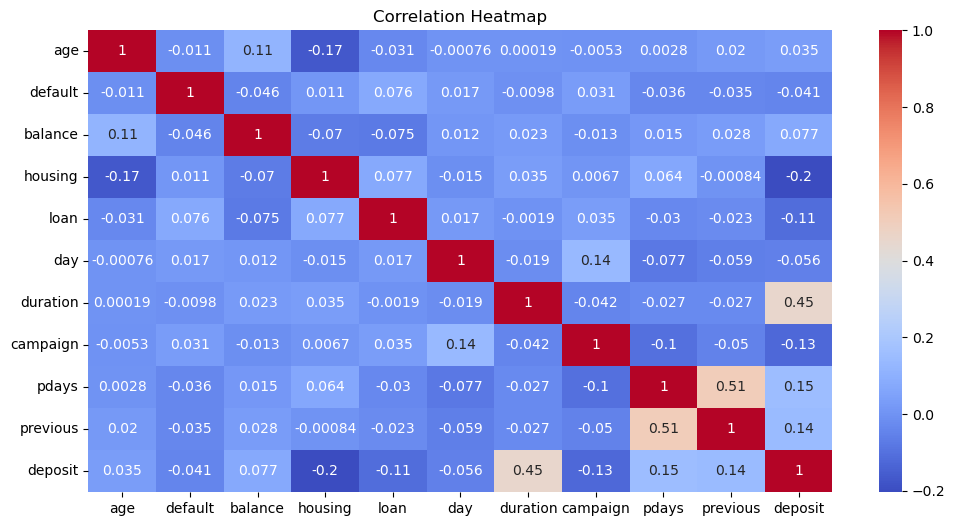

In [152]:
plt.figure(figsize = (12,6))

sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

* The diagonal cells of the heatmap show a perfect positive correlation (1.0), as expected, since a variable is always perfectly correlated with itself.
* The heatmap reveals several strong correlations between the variables, including:
* A strong positive correlation between "previous" and "pdays" (0.51).
* A strong positive correlation between "duration" and "deposit" (0.45).
* A strong negative correlation between "duration" and "campaign" (-0.42).
* The heatmap also shows some weak correlations between the variables, indicating that there are no strong linear relationships between most of the variables.

#### 8. Distribution of Marital Subscription

In [156]:
# Count values
marital_counts = loan_data['marital'].value_counts()

In [158]:
marital_counts

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

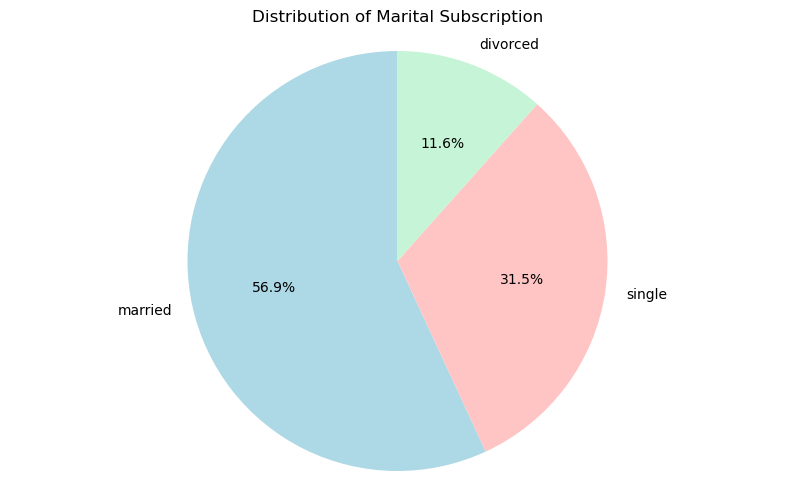

In [160]:
# Plot pie chart
plt.figure(figsize=(10,6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ADD8E6', '#FFC5C5', '#C6F4D6'])
plt.title('Distribution of Marital Subscription')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

* Married: 56.9%
* Single: 31.5%
* Divorced: 11.6%
* The image provides valuable insights into the distribution of marital subscriptions.
* The dominance of married individuals suggests that they are more likely to subscribe to the service or product being analyzed.
* The relatively smaller proportion of divorced individuals may indicate that they are less likely to subscribe or have different preferences.

<center>
  <h1 style="font-weight: bold; color: darkblue;">OUTLIER TREATMENT</h1>
</center>

#### Finding outliers

In [165]:
loan_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_group'],
      dtype='object')

#### Plotting the box plot of the numerical columns

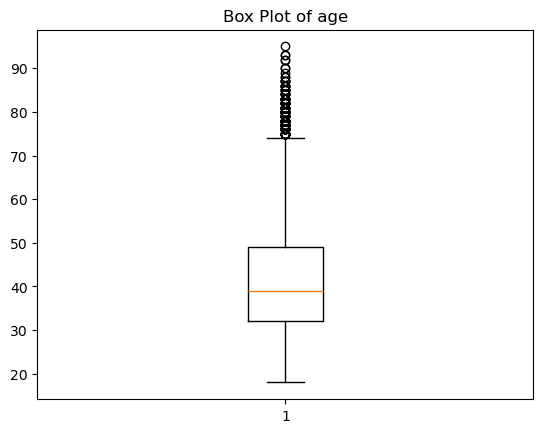

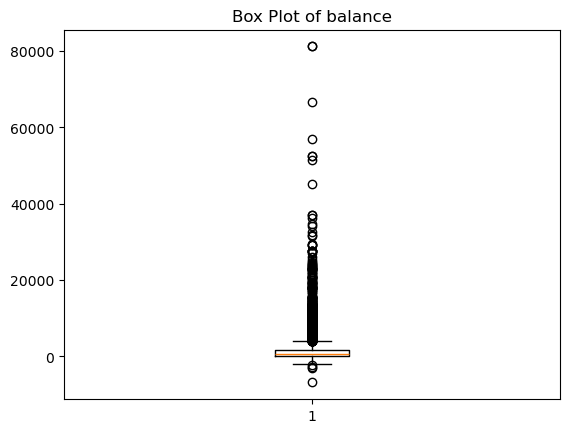

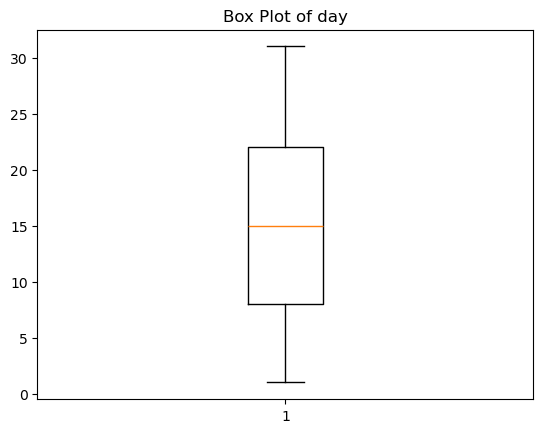

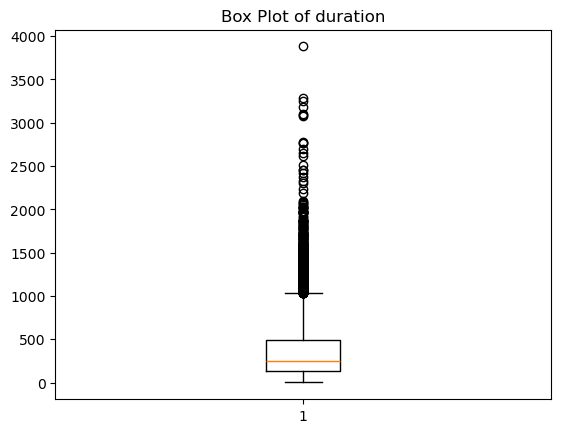

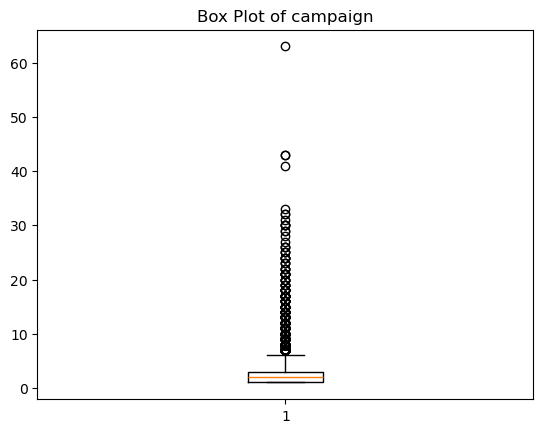

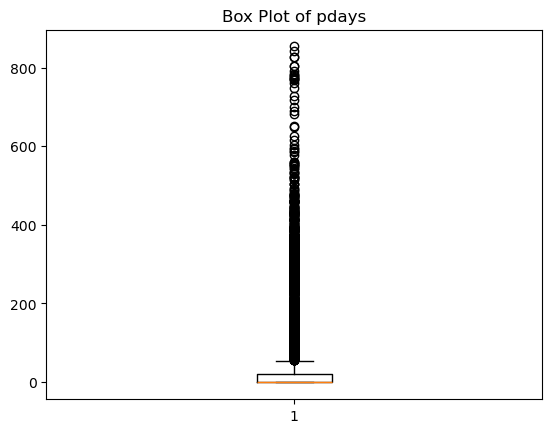

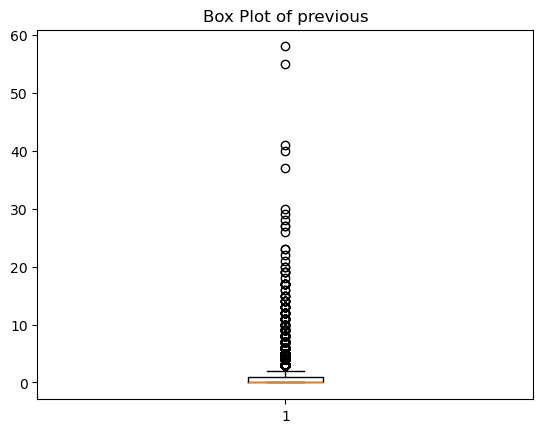

In [168]:
for i in loan_num_cols:
    plt.boxplot(loan_num_cols[i])
    plt.title(f"Box Plot of {i}")
    plt.show()

* Outliers were detected.

#### Handling the outliers

In [171]:
for i in loan_num_cols:
    Q1 = loan_data[i].quantile(0.25)
    Q3 = loan_data[i].quantile(0.75)
    IQR = Q3 - Q1
    UW = Q3 + 1.5 * IQR
    LW = Q1 - 1.5 * IQR
    loan_data[i] = np.clip(loan_data[i], LW, UW)

#### Checking whether the outliers filled or not

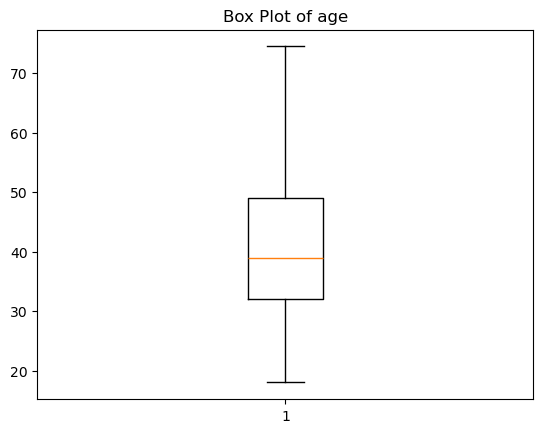

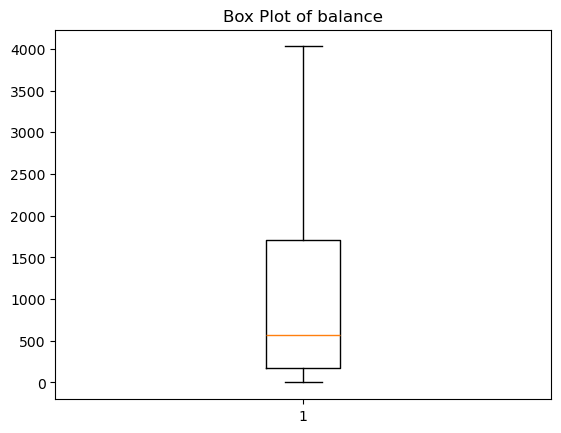

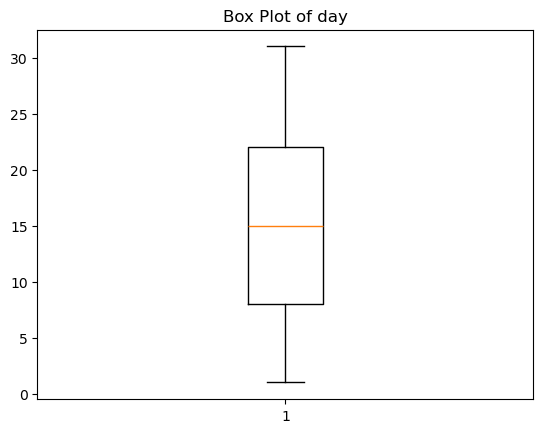

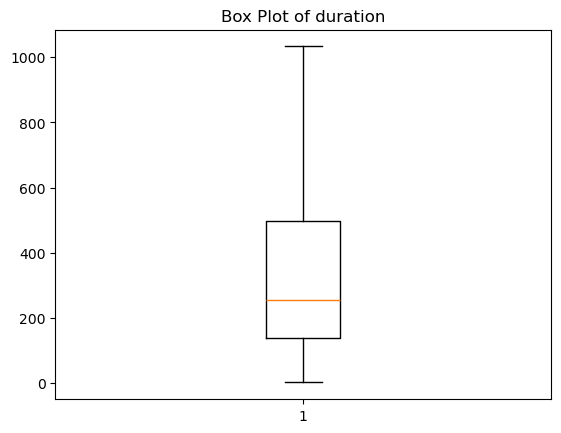

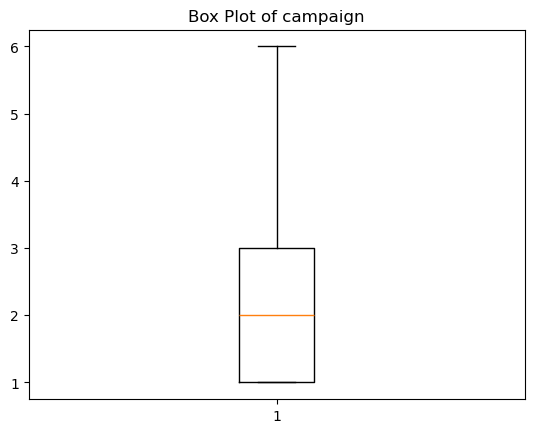

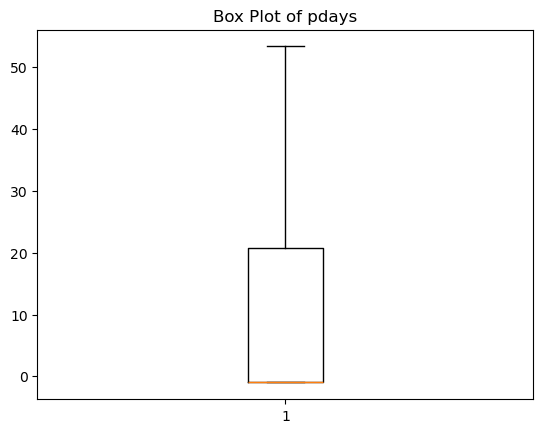

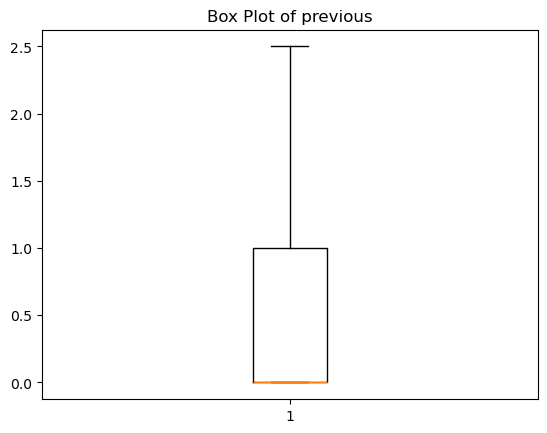

In [173]:
for i in loan_num_cols:
    plt.boxplot(loan_data[i])
    plt.title(f"Box Plot of {i}")
    plt.show()

* Outliers successfully handled.

<center>
  <h1 style="font-weight: bold; color: darkblue;">MODEL BUILDING</h1>
</center>

#### Assuming 'deposit' is the target column

In [180]:
# Separate features and target

X = loan_data.drop('deposit', axis=1)
y = loan_data['deposit']

* We separate the dataset into:
* x: Features (independent variables)
* y: Target (dependent variable — whether the client subscribed to a term deposit)

This step is fundamental to supervised learning, where the model learns patterns from the input features to predict the target variable, which in this case is deposit.

#### Encode categorical variables

In [185]:
# One-hot encode categorical variables

X = pd.get_dummies(X, drop_first=True)

* Many machine learning models (like XGBoost) can't handle text directly.
* We use one-hot encoding to convert categorical columns into binary columns (0/1).
*  drop_first=True avoids multicollinearity by dropping the first category in each set.

Encoding ensures that all input features are numeric and suitable for modeling, while drop_first=True prevents redundant columns that could skew the model.

#### Encode target variable to numerical

In [190]:
# Importing LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Asigning LabelEncoder() to a variable
le = LabelEncoder()

# Encode target variable
y = le.fit_transform(y)

*  LabelEncoder converts labels like "yes"/"no" to numeric values like 1 and 0.
* Essential for binary classification.

The target variable is encoded to a binary format so that it can be interpreted correctly by the XGBoost classifier.

#### Train-Test-Split

In [195]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

* Data is split into 80% for training and 20% for testing.
* stratify=y ensures class distribution is maintained in both sets.
* random_state=42 ensures reproducibility.

A proper train-test split allows for fair model evaluation, and stratification avoids bias from imbalanced classes.

#### 1. Logistic Regression

In [200]:
# Initialize the model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, Y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, y_pred_lr)
conf_matrix = confusion_matrix(Y_test, y_pred_lr)
precision = precision_score(Y_test, y_pred_lr)
recall = recall_score(Y_test, y_pred_lr)
f1 = f1_score(Y_test, y_pred_lr)

# Print output
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Confusion matrix: \n{conf_matrix}")
print(f"Logistic Regression Precision: {precision:.4f}")
print(f"Logistic Regression Recall: {recall:.4f}")
print(f"Logistic Regression f1_score: {f1:.4f}")

Logistic Regression Accuracy: 0.8253
Logistic Regression Confusion matrix: 
[[989 186]
 [204 854]]
Logistic Regression Precision: 0.8212
Logistic Regression Recall: 0.8072
Logistic Regression f1_score: 0.8141


#### 2. Decision Tree Classifier

In [203]:
# Initialize the model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # You can tune max_depth

# Train the model
dt_model.fit(X_train, Y_train)

# Predict on test data
y_pred_dtc = dt_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, y_pred_dtc)
conf_matrix = confusion_matrix(Y_test, y_pred_dtc)
precision = precision_score(Y_test, y_pred_dtc)
recall = recall_score(Y_test, y_pred_dtc)
f1 = f1_score(Y_test, y_pred_dtc)

# Print output
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(f"Decision Tree Confusion matrix: \n{conf_matrix}")
print(f"Decision Tree Precision: {precision:.4f}")
print(f"Decision Tree Recall: {recall:.4f}")
print(f"Decision Tree f1_score: {f1:.4f}")

Decision Tree Accuracy: 0.8065
Decision Tree Confusion matrix: 
[[946 229]
 [203 855]]
Decision Tree Precision: 0.7887
Decision Tree Recall: 0.8081
Decision Tree f1_score: 0.7983


#### 3. Random Forest Classifier

In [206]:
# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [207]:
# Predict on test data
y_pred_rfc = rf_model.predict(X_test)

In [210]:
# Evaluate
accuracy = accuracy_score(Y_test, y_pred_rfc)
conf_matrix = confusion_matrix(Y_test, y_pred_rfc)
precision = precision_score(Y_test, y_pred_rfc)
recall = recall_score(Y_test, y_pred_rfc)
f1 = f1_score(Y_test, y_pred_rfc)

# Print output
print(f"Randon Forest Accuracy: {accuracy:.4f}")
print(f"Randon Forest Confusion matrix: \n{conf_matrix}")
print(f"Randon Forest Precision: {precision:.4f}")
print(f"Randon Forest Recall: {recall:.4f}")
print(f"Randon Forest f1_score: {f1:.4f}")

Randon Forest Accuracy: 0.8406
Randon Forest Confusion matrix: 
[[967 208]
 [148 910]]
Randon Forest Precision: 0.8140
Randon Forest Recall: 0.8601
Randon Forest f1_score: 0.8364


#### 4. K-Nearest Neighbors (KNN)

In [213]:
metrix_k = []
neighbors = range(1,12)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier = classifier.fit(X_train,Y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(Y_test,y_pred_knn)
    metrix_k.append(acc)

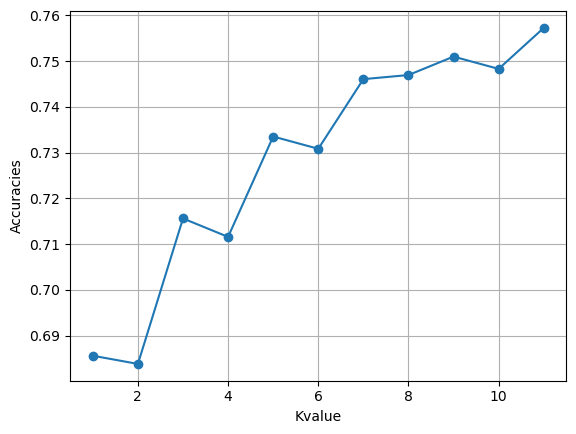

In [214]:
plt.plot(neighbors,metrix_k,'o-')
plt.xlabel('Kvalue')
plt.ylabel('Accuracies')
plt.grid()

In [215]:
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier = classifier.fit(X_train,Y_train)
y_pred_KNN = classifier.predict(X_test)

In [216]:
# Evaluate
accuracy = accuracy_score(Y_test, y_pred_KNN)
conf_matrix = confusion_matrix(Y_test,y_pred_KNN)
precision = precision_score(Y_test, y_pred_KNN)
recall = recall_score(Y_test, y_pred_KNN)
f1 = f1_score(Y_test, y_pred_KNN)

In [217]:
# Print output
print(f"KNN Accuracy: {accuracy_score(Y_test, y_pred_KNN):.4f}")
print(f"KNN Confusion matrix: \n{conf_matrix}")
print(f"KNN Precision: {precision:.4f}")
print(f"KNN Recall: {recall:.4f}")
print(f"KNN f1_score: {f1:.4f}")

KNN Accuracy: 0.7573
KNN Confusion matrix: 
[[910 265]
 [277 781]]
KNN Precision: 0.7467
KNN Recall: 0.7382
KNN f1_score: 0.7424


#### 5. Support Vector Machine (SVM)

In [224]:
# Initialize the model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  

# Train the model
svm_model.fit(X_train, Y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate 
accuracy = accuracy_score(Y_test, y_pred_svm)
conf_matrix = confusion_matrix(Y_test,y_pred_svm)
precision = precision_score(Y_test, y_pred_svm)
recall = recall_score(Y_test, y_pred_svm)
f1 = f1_score(Y_test, y_pred_svm)

# Print output
print(f"SVM Accuracy: {accuracy:.4f}")
print(f"SVM Confusion matrix: \n{conf_matrix}")
print(f"SVM Precision: {precision:.4f}")
print(f"SVM Recall: {recall:.4f}")
print(f"SVM f1_score: {f1:.4f}")

SVM Accuracy: 0.7443
SVM Confusion matrix: 
[[920 255]
 [316 742]]
SVM Precision: 0.7442
SVM Recall: 0.7013
SVM f1_score: 0.7221


#### 6. Gradient Boosting Classifier

In [227]:
#Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, Y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate 
accuracy = accuracy_score(Y_test, y_pred_gb)
conf_matrix = confusion_matrix(Y_test,y_pred_gb)
precision = precision_score(Y_test, y_pred_gb)
recall = recall_score(Y_test, y_pred_gb)
f1 = f1_score(Y_test, y_pred_gb)

# Print output
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")
print(f"Gradient Boosting Confusion matrix: \n{conf_matrix}")
print(f"Gradient Boosting Precision: {precision:.4f}")
print(f"Gradient Boosting Recall: {recall:.4f}")
print(f"Gradient Boosting f1_score: {f1:.4f}")

Gradient Boosting Accuracy: 0.8495
Gradient Boosting Confusion matrix: 
[[985 190]
 [146 912]]
Gradient Boosting Precision: 0.8276
Gradient Boosting Recall: 0.8620
Gradient Boosting f1_score: 0.8444


#### 7. LightGBM Classifier

In [229]:
#Initialize the LightGBM model
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
lgbm_model.fit(X_train, Y_train)

# Predict on test data
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, y_pred_lgbm)
conf_matrix = confusion_matrix(Y_test,y_pred_lgbm)
precision = precision_score(Y_test, y_pred_lgbm)
recall = recall_score(Y_test, y_pred_lgbm)
f1 = f1_score(Y_test, y_pred_lgbm)

# Print output
print(f"LightGBM Accuracy: {accuracy:.4f}")
print(f"LightGBM Confusion matrix: \n{conf_matrix}")
print(f"LightGBM Precision: {precision:.4f}")
print(f"LightGBM Recall: {recall:.4f}")
print(f"LightGBM f1_score: {f1:.4f}")

[LightGBM] [Info] Number of positive: 4231, number of negative: 4698
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 8929, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473849 -> initscore=-0.104699
[LightGBM] [Info] Start training from score -0.104699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

#### 8. CatBoost Classifier

In [233]:
# Initialize the CatBoost model
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=5, random_seed=42, verbose=0)

# Train the model
catboost_model.fit(X_train, Y_train)

# Predict on test data
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, y_pred_catboost)
conf_matrix = confusion_matrix(Y_test, y_pred_catboost)
precision = precision_score(Y_test, y_pred_catboost)
recall = recall_score(Y_test, y_pred_catboost)
f1 = f1_score(Y_test, y_pred_catboost)

# Print output
print(f"CatBoost Accuracy: {accuracy:.4f}")
print(f"CatBoost Confusion matrix: \n{conf_matrix}")
print(f"CatBoost Precision: {precision:.4f}")
print(f"CatBoost Recall: {recall:.4f}")
print(f"CatBoost f1_score: {f1:.4f}")


CatBoost Accuracy: 0.8594
CatBoost Confusion matrix: 
[[984 191]
 [123 935]]
CatBoost Precision: 0.8304
CatBoost Recall: 0.8837
CatBoost f1_score: 0.8562


#### 9. XGBoost Classifier

In [236]:
# Train the XGBoost model
xgb = XGBClassifier(eta=0.1, max_depth=6, subsample=0.85)   # Reduced max_depth for stability

# Train the model
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [237]:
# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, y_pred_xgb)
conf_matrix = confusion_matrix(Y_test,y_pred_xgb)
precision = precision_score(Y_test, y_pred_xgb)
recall = recall_score(Y_test, y_pred_xgb)
f1 = f1_score(Y_test, y_pred_xgb)

# Print output
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Confusion matrix: \n{conf_matrix}")
print(f"XGBoost Precision: {precision:.4f}")
print(f"XGBoost Recall: {recall:.4f}")
print(f"XGBoost f1_score: {f1:.4f}")

XGBoost Accuracy: 0.8657
XGBoost Confusion matrix: 
[[985 190]
 [110 948]]
XGBoost Precision: 0.8330
XGBoost Recall: 0.8960
XGBoost f1_score: 0.8634


* XGBClassifier is an advanced gradient boosting algorithm optimized for speed and performance.
* eta : controls the learning rate (how fast the model learns).
* max_depth : limits how deep each tree can grow — avoids overfitting.
* subsample : randomly samples rows to introduce variation and reduce overfitting.

XGBoost is chosen for its high accuracy and efficiency. The parameters are tuned to prevent overfitting and ensure stable learning.

<center>
  <h1 style="font-weight: bold; color: darkblue;">TABULATING THE RESULTS OF MODELS</h1>
</center>

In [243]:
table = [['Model', 'Accuracy','Confusion Matrix','Precision','Recall','f1_Score'],
         ['Logistic Regression', accuracy_score(Y_test, y_pred_lr),confusion_matrix(Y_test,y_pred_lr),
          precision_score(Y_test, y_pred_lr),recall_score(Y_test, y_pred_lr),f1_score(Y_test, y_pred_lr)],
         ['Decision Tree', accuracy_score(Y_test, y_pred_dtc),confusion_matrix(Y_test,y_pred_dtc),
          precision_score(Y_test, y_pred_dtc),recall_score(Y_test, y_pred_dtc),f1_score(Y_test, y_pred_dtc)],
         ['Random Forest', accuracy_score(Y_test, y_pred_rfc),confusion_matrix(Y_test,y_pred_rfc),
          precision_score(Y_test, y_pred_rfc),recall_score(Y_test, y_pred_rfc),f1_score(Y_test, y_pred_rfc)],
         ['KNN', accuracy_score(Y_test, y_pred_knn),confusion_matrix(Y_test,y_pred_knn),
          precision_score(Y_test, y_pred_knn),recall_score(Y_test, y_pred_knn),f1_score(Y_test, y_pred_knn)],
         ['SVM', accuracy_score(Y_test, y_pred_svm),confusion_matrix(Y_test,y_pred_svm),
          precision_score(Y_test, y_pred_svm),recall_score(Y_test, y_pred_svm),f1_score(Y_test, y_pred_svm)],
         ['Gradient Boosting', accuracy_score(Y_test, y_pred_gb),confusion_matrix(Y_test,y_pred_gb),
          precision_score(Y_test, y_pred_gb),recall_score(Y_test, y_pred_gb),f1_score(Y_test, y_pred_gb)],
         ['LightGBM', accuracy_score(Y_test, y_pred_lgbm),confusion_matrix(Y_test,y_pred_lgbm),
          precision_score(Y_test, y_pred_lgbm),recall_score(Y_test, y_pred_lgbm),f1_score(Y_test, y_pred_lgbm)],
         ['CatBoost', accuracy_score(Y_test, y_pred_catboost),confusion_matrix(Y_test,y_pred_catboost),
          precision_score(Y_test, y_pred_catboost),recall_score(Y_test, y_pred_catboost),f1_score(Y_test, y_pred_catboost)],
         ['XGBoost', accuracy_score(Y_test, y_pred_xgb),confusion_matrix(Y_test,y_pred_xgb),
          precision_score(Y_test, y_pred_xgb),recall_score(Y_test, y_pred_xgb),f1_score(Y_test, y_pred_xgb)]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤════════════╤════════════════════╤═════════════╤══════════╤════════════╕
│ Model               │   Accuracy │ Confusion Matrix   │   Precision │   Recall │   f1_Score │
╞═════════════════════╪════════════╪════════════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression │   0.825347 │ [[989 186]         │    0.821154 │ 0.807183 │   0.814109 │
│                     │            │  [204 854]]        │             │          │            │
├─────────────────────┼────────────┼────────────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree       │   0.806538 │ [[946 229]         │    0.788745 │ 0.808129 │   0.798319 │
│                     │            │  [203 855]]        │             │          │            │
├─────────────────────┼────────────┼────────────────────┼─────────────┼──────────┼────────────┤
│ Random Forest       │   0.840573 │ [[967 208]         │    0.813953 │ 0.860113 │   0.836397 │
│                     │            │  [1

* The table allows for a direct comparison of the performance of different machine learning models based on various metrics.
* XGBoost appears to be the best-performing model based on accuracy (0.865652), precision (0.83304), recall (0.89603), and f1_Score (0.863388).
* The confusion matrices provide detailed information about the true positives, false positives, true negatives, and false negatives for each model.
* For instance, XGBoost has a confusion matrix of [[985 190] [110 948]], indicating 985 true negatives, 190 false positives, 110 false negatives, and 948 true positives.
* SVM has the lowest accuracy (0.74429) and f1_Score (0.722141) among the listed models, suggesting it might not be the best choice for this particular task.

<center>
  <h1 style="font-weight: bold; color: darkblue;">VISUALIZING MODEL PERFORMANCE</h1>
</center>

In [247]:
# Model names
models_plot = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM',
          'Gradient Boosting', 'LightGBM','CatBoost', 'XGBoost']

In [249]:
# Corresponding accuracies
accuracies = [
    accuracy_score(Y_test, y_pred_lr),
    accuracy_score(Y_test, y_pred_dtc),
    accuracy_score(Y_test, y_pred_rfc),
    accuracy_score(Y_test, y_pred_knn),
    accuracy_score(Y_test, y_pred_svm),
    accuracy_score(Y_test, y_pred_gb),
    accuracy_score(Y_test, y_pred_lgbm),
    accuracy_score(Y_test, y_pred_catboost),
    accuracy_score(Y_test, y_pred_xgb)

]

# Corresponding precision score
precision = [
    precision_score(Y_test, y_pred_lr),
    precision_score(Y_test, y_pred_dtc),
    precision_score(Y_test, y_pred_rfc),
    precision_score(Y_test, y_pred_knn),
    precision_score(Y_test, y_pred_svm),
    precision_score(Y_test, y_pred_gb),
    precision_score(Y_test, y_pred_lgbm),
    precision_score(Y_test, y_pred_catboost),
    precision_score(Y_test, y_pred_xgb)
]

# Corresponding recall score
recall = [
    recall_score(Y_test, y_pred_lr),
    recall_score(Y_test, y_pred_dtc),
    recall_score(Y_test, y_pred_rfc),
    recall_score(Y_test, y_pred_knn),
    recall_score(Y_test, y_pred_svm),
    recall_score(Y_test, y_pred_gb),
    recall_score(Y_test, y_pred_catboost),
    recall_score(Y_test, y_pred_xgb)
]

# Corresponding f1_score score
F1 = [
    f1_score(Y_test, y_pred_lr),
    f1_score(Y_test, y_pred_dtc),
    f1_score(Y_test, y_pred_rfc),
    f1_score(Y_test, y_pred_knn),
    f1_score(Y_test, y_pred_svm),
    f1_score(Y_test, y_pred_gb),
    f1_score(Y_test, y_pred_lgbm),
    f1_score(Y_test, y_pred_catboost),
    f1_score(Y_test, y_pred_xgb)
]

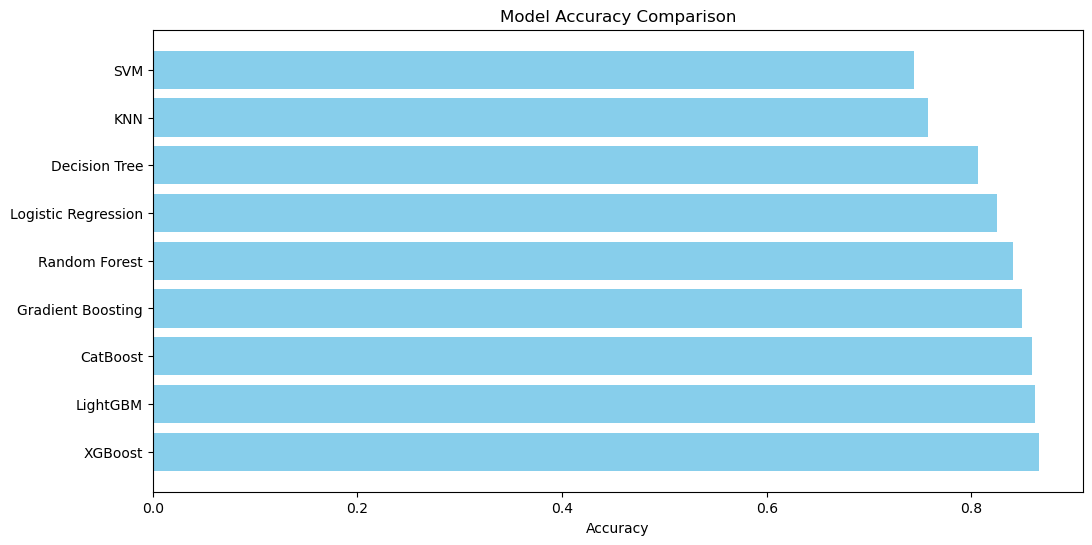

In [251]:
# Plotting
plt.figure(figsize=(12, 6))
sorted_pairs = sorted(zip(models_plot, accuracies), key=lambda x: x[1], reverse=True)
plt.barh(*zip(*sorted_pairs), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

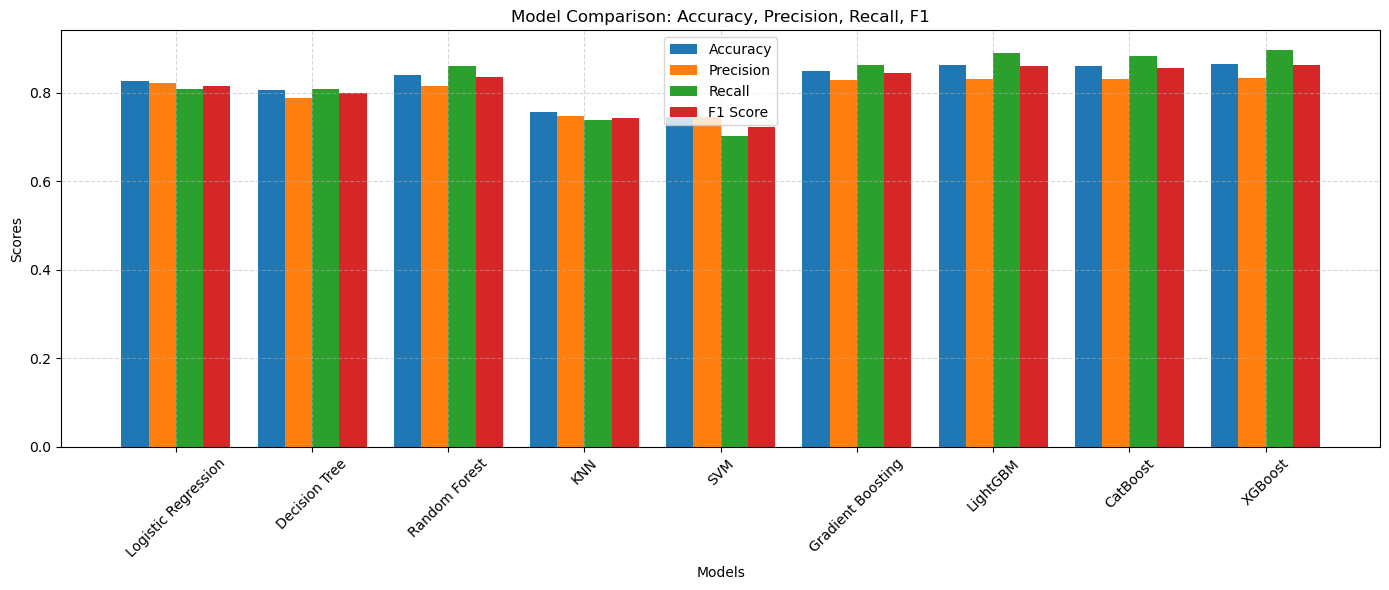

In [252]:
# List of models with names and model objects
models = [
    ('Logistic Regression', lr_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('KNN', classifier),
    ('SVM', svm_model),
    ('Gradient Boosting', gb_model),
    ('LightGBM', lgbm_model),
    ('CatBoost', catboost_model),
    ('XGBoost', xgb)
]

# Metric containers
models_plot = []
accuracies = []
precision = []
recall = []
F1 = []

# Compute metrics
for name, model in models:
    y_pred = model.predict(X_test)

    models_plot.append(name)
    accuracies.append(accuracy_score(Y_test, y_pred))
    precision.append(precision_score(Y_test, y_pred))
    recall.append(recall_score(Y_test, y_pred))
    F1.append(f1_score(Y_test, y_pred))

# Plotting
x = np.arange(len(models_plot))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
ax.bar(x - 0.5*width, precision, width, label='Precision')
ax.bar(x + 0.5*width, recall, width, label='Recall')
ax.bar(x + 1.5*width, F1, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Accuracy, Precision, Recall, F1')
ax.set_xticks(x)
ax.set_xticklabels(models_plot, rotation=45)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


<center>
  <h1 style="font-weight: bold; color: darkblue;">EVALUATING THE MODEL</h1>
</center>

In [256]:
# Evaluate
accuracy = accuracy_score(Y_test, y_pred_xgb)
conf_matrix = confusion_matrix(Y_test,y_pred_xgb)
precision = precision_score(Y_test, y_pred_xgb)
recall = recall_score(Y_test, y_pred_xgb)
f1 = f1_score(Y_test, y_pred_xgb)

# Print output
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Confusion matrix: \n{conf_matrix}")
print(f"XGBoost Precision: {precision:.4f}")
print(f"XGBoost Recall: {recall:.4f}")
print(f"XGBoost f1_score: {f1:.4f}")
print(f"XGBoost Accuracy: {accuracy:.4f}")

XGBoost Accuracy: 0.8657
XGBoost Confusion matrix: 
[[985 190]
 [110 948]]
XGBoost Precision: 0.8330
XGBoost Recall: 0.8960
XGBoost f1_score: 0.8634
XGBoost Accuracy: 0.8657


#### Plotting Feature Importance

In [259]:
# Assuming xgb is your XGBoost model and X is your feature data
xgb.fit(X, y)  # Fit the model to the data

# Assigning feature importance into a variable
importances = pd.Series(xgb.feature_importances_, index=X.columns)

# Setting it into descending order
importances = importances.sort_values(ascending=False).head(10)  # Top 10 features

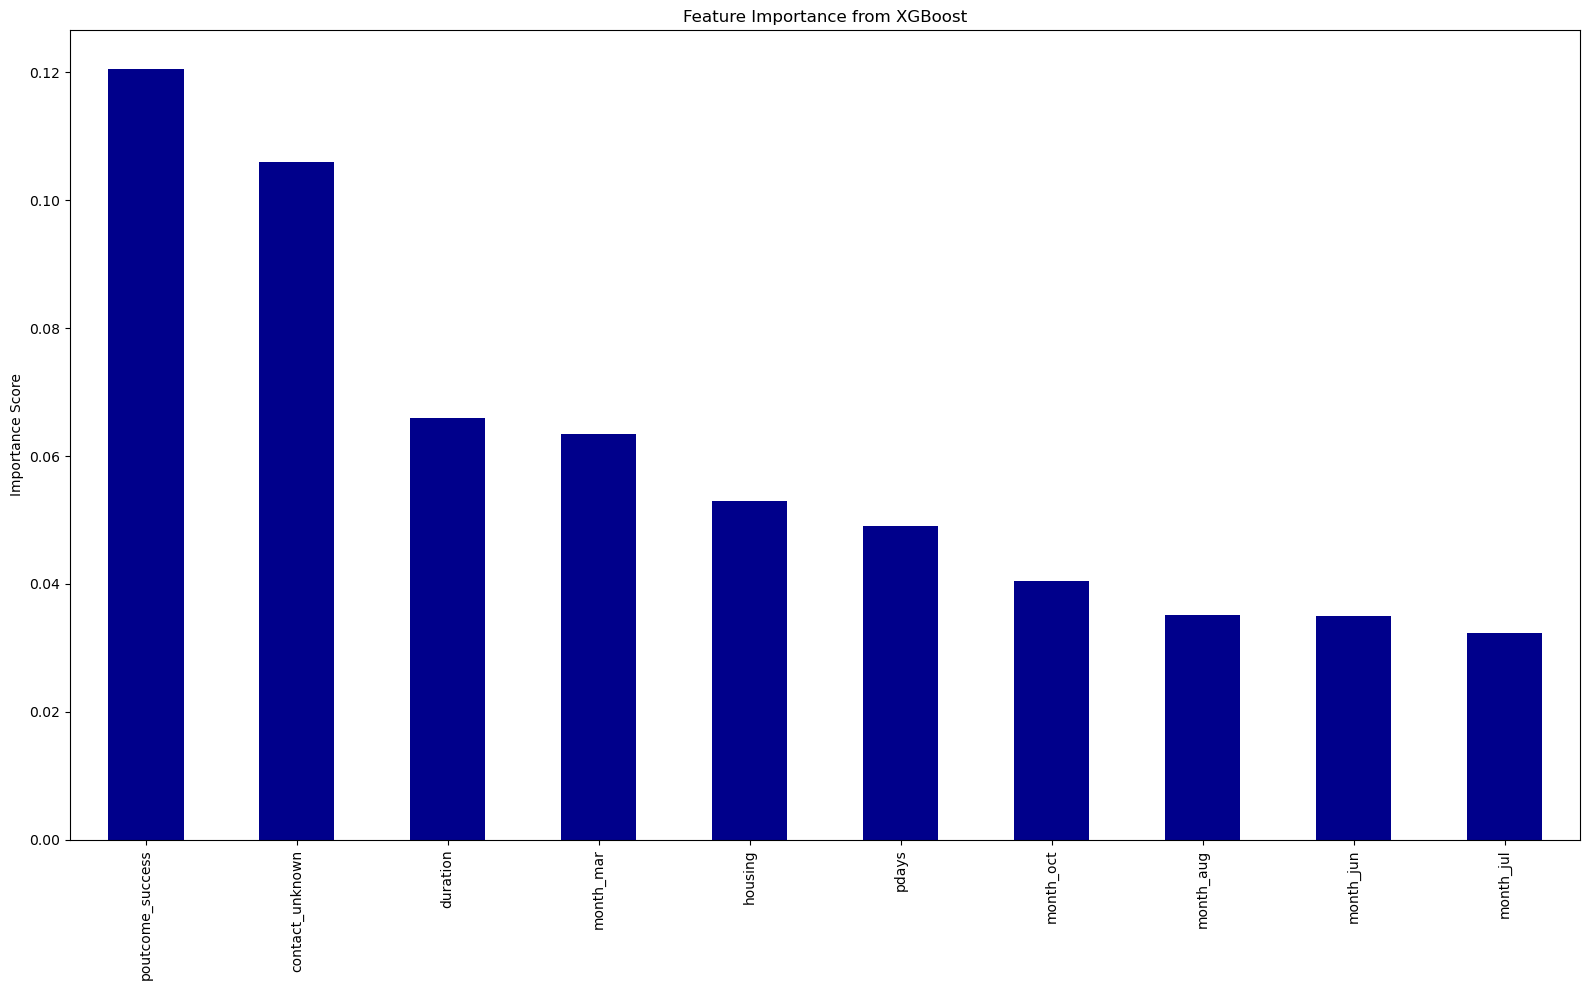

In [261]:
# Plot the feature importance
plt.figure(figsize=(16,10))
importances.plot(kind='bar', color='darkblue')
plt.title('Feature Importance from XGBoost')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

<center>
  <h1 style="font-weight: bold; color: darkblue;">HYPERPARAMETER TUNING</h1>
</center>

#### GridSearch CV

In [265]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.85, 1.0],
    'colsample_bytree': [0.7, 0.85, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [267]:
# Create the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [269]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',   
    cv=5,                 # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

In [271]:
# Fit the model
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.85, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.7, 0.85, 1.0]},
             scoring='accuracy', verbose=1)

In [273]:
# Output the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.7}
Best Accuracy Score: 0.8602301749367159


* Interestingly, adjusting the hyperparameters led to a minor drop in accuracy, indicating that the model performed better with its default settings for this dataset.

#### RandomizedSearch CV

In [277]:
# Define the parameter grid with lists of values
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

In [279]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [281]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,           # Number of combinations to sample
    scoring='accuracy',  
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [283]:
# Fit the model
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 6, 8, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [285]:
# Output best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best Accuracy Score: 0.8614618523781292


* Notably, hyperparameter tuning resulted in a slight decrease in model accuracy, suggesting that the default parameters may have been more effective for this particular dataset.

<center>
  <h1 style="font-weight: bold; color: darkblue;">CONCLUSION</h1>
</center>

* In this project, we conducted a comprehensive analysis of the Bank Marketing dataset with the goal of predicting whether a customer will subscribe to a term deposit.
* The dataset provided detailed customer information, including demographics, financial status, and previous interactions with marketing campaigns.
* We performed exploratory data analysis (EDA) to understand feature distributions and relationships, followed by data preprocessing to handle categorical variables, and missing values.
* Several classification models were implemented and evaluated, such as logistic regression, decision trees, and potentially ensemble methods like random forests or gradient boosting.
* Performance metrics such as accuracy, precision, recall, confusion matrix, and F1-score were used to assess each model's effectiveness.
*  In this project, we get best performance using XGBoost, a powerful tree-based model, to predict whether a client would subscribe to a term deposit (deposit column).
* The dataset was preprocessed using one-hot encoding and label encoding to convert categorical features and target labels into numerical formats.
* We split the data using an 80/20 ratio and trained the XGBoost classifier using tuned parameters.
* The model achieved an accuracy score of 0.8657 (86%), a presicion score of 0.8330 (83%), a recall score of 0.8960 (89%), and a f1_score of 0.8633 (86%) indicating effective learning from the dataset.
* The final results demonstrated that machine learning models can effectively predict customer behavior in banking marketing campaigns.
* This can assist financial institutions in targeting the right audience and optimizing their marketing strategies.
* Further improvements can be made by tuning hyperparameters, incorporating more complex models, and addressing class imbalance if present.
* Notably, hyperparameter tuning resulted in a slight decrease in model accuracy.